# Settings

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

import warnings
import numpy as np
import pandas as pd

import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=1.5) 

# warning 출력 ignore
warnings.filterwarnings(action='ignore')

# 그래프에서 '-' 기호 때문에 문제 발생하는것 방지
mpl.rcParams['axes.unicode_minus'] = False

# 한글폰트 적용
font_path = 'C:/jupyter_home/font/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [36]:
import re    # 정규식

In [217]:
pd.set_option('display.max_rows', None)

# import

In [10]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [11]:
df_train.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0


In [12]:
df_test.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치


In [13]:
df_train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계'],
      dtype='object')

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              50 non-null     object 
 1   요일              50 non-null     object 
 2   본사정원수           50 non-null     int64  
 3   본사휴가자수          50 non-null     int64  
 4   본사출장자수          50 non-null     int64  
 5   본사시간외근무명령서승인건수  50 non-null     int64  
 6   현본사소속재택근무자수     50 non-null     float64
 7   조식메뉴            50 non-null     object 
 8   중식메뉴            50 non-null     object 
 9   석식메뉴            50 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.0+ KB


In [16]:
df_train[df_train['석식계'] == 0 ]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
204,2016-11-30,수,2689,68,207,0,0.0,모닝롤/카스텔라 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 고추장찌개 ...,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거*요거트D 감자샐러드 오복지무침 ...,*,1109.0,0.0
224,2016-12-28,수,2705,166,225,0,0.0,모닝롤/고구마파이 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 북어계란국 ...,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉...,*,767.0,0.0
244,2017-01-25,수,2697,79,203,0,0.0,모닝롤/토마토샌드 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 ...,카레덮밥 (쌀:국내산) 맑은국 유린기 개성감자만두 오이사과무침 포기김치 (김...,*,720.0,0.0
262,2017-02-22,수,2632,75,252,0,0.0,모닝롤/브라우니 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 꽃게탕 명엽채...,나물비빔밥 (쌀:국내산) 유부장국 생선까스*탈탈소스 파스타샐러드 마늘쫑볶음 ...,*,1065.0,0.0
281,2017-03-22,수,2627,53,235,0,0.0,모닝롤/찐빵 우유/주스 계란후라이 김치죽/쌀밥 (쌀:국내산) 콩나물국 김실파무침...,쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개 유린기 비엔나볶음 세발나물 깍두기 (...,*,953.0,0.0
306,2017-04-26,수,2626,45,304,0,0.0,모닝롤/와플 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 된장찌개 검정콩조...,비빔밥 (쌀:국내산) 맑은국 오징어튀김 견과류조림 하와이안샐러드 깍두기 (김...,*,835.0,0.0
327,2017-05-31,수,2637,43,265,0,0.0,모닝롤/베이글 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 자...,열무보리비빔밥 (쌀:국내산) 가쯔오장국 탕수만두 콥샐러드 오이지무침 포기김치...,자기계발의날,910.0,0.0
346,2017-06-28,수,2648,58,259,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 쇠고기매운국 고...,콩나물밥 (쌀:국내산) 얼갈이된장국 삼치구이 잡채 아삭고추무침 깍두기 (김치...,*자기계발의날*,745.0,0.0
366,2017-07-26,수,2839,254,246,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 민물새우찌개 숙...,나물비빔밥 미소장국 파스타샐러드 소세지오븐구이 오렌지 포기김치 (김치:국내산),가정의날,797.0,0.0
392,2017-09-01,금,2642,177,303,45,0.0,모닝롤/단팥빵 우유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 대구찌개 깻순나...,쌀밥/잡곡밥 (쌀:국내산) 시래기국 훈제오리구이 두부구이*양념장 쌈무/양파절임...,*,663.0,0.0


- 휴일은 제외한 나머지 요일의 중식, 석식 수요자를 나타내었다.

<시도해 볼 수 있는것>
- 석식계, 중식계 최대 최소 boxplot 보기
- 요일별 석식계, 중식계 최대 최소 boxplot 보기
- 요일별 ['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수','현본사소속재택근무자수']
- 주별 ['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수','현본사소속재택근무자수']


<null 없애야하는것>
- 석식메뉴가 없는날 (쉬는날이거나 일찍끝나는날이려나?) 석식계가 없는날이 있음
    - 확인해보니까 석식메뉴가 있는날인데도 석식계가 없는날이 있음
    - 중식계가 0인 날은 없음
    - 석식메뉴가 없는날을 추출해 보니까 거의 수요일임 : 매주 마지막주 수요일은 자기계발의 날인것같음

<단어추출 필요할까요 ㅠㅠ?>
- 어떤 음식이 메뉴에 나오는지에 따라서도 중식계, 석식계 차이가 날수 있음
- 중식계, 석식계가 많은날, 적은날 단어 추출하여 어떤게 많은지 찾아보기?

<추가 아이디어>
- ~~휴일에는 중식, 석식을 제공하지 않는다는 전제하에!! 요일이 비어있는날을 휴일이라고 생각하고 휴일이랑 맞닿아있는 날들을 추출하기~~
  - ~~예시 : 4일연휴일때? 등 (휴가자수로 알수있으려나)~~
  - 휴일이 있는주, 없는주로 하려고 했는데... 휴일이 있으면 있어서 연차내고, 없으면 없어서 연차낼것같아서 섣불리 안하는게 좋을것같음
 
  

# EDA

### 01) Normal

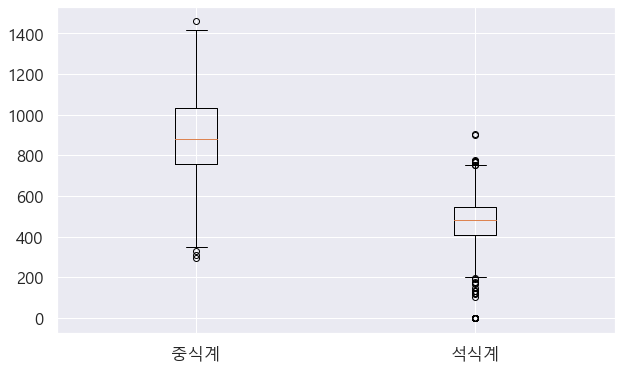

In [17]:
# 중식계, 석식계

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1,1,1)
ax.boxplot(df_train[['중식계', '석식계']],
           labels = ['중식계', '석식계'])
plt.show()

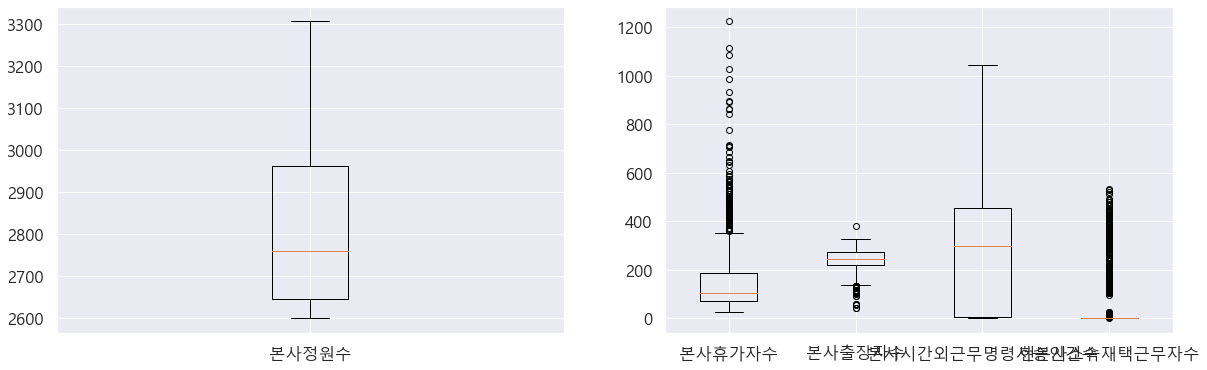

In [18]:
# ['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수','현본사소속재택근무자수']

fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.boxplot(df_train['본사정원수'],
             labels = ['본사정원수'])
ax2.boxplot(df_train[['본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수','현본사소속재택근무자수']],
            labels = ['본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수','현본사소속재택근무자수'])
plt.show()

- 본사 휴가자수는 평소 많이 없어서 평균이 낮지만, 휴가자수가 많은날에는 몰리는것으로 예측
- 본사 출장자수는 평균이 생각보다 높았으며, 균일하다고 볼 수 있을 것 같다.
- 재택근무자수는 평균0명 이라서 이상치가 많이 나오는것 같다.

In [19]:
df_train.groupby('요일', as_index=False)[['중식계', '석식계']].mean()

,요일,중식계,석식계
0,금,653.609959,404.979253
1,목,823.991803,480.401639
2,수,905.213389,363.615063
3,월,1144.331950,538.933610
4,화,925.620833,520.129167


<AxesSubplot:xlabel='요일', ylabel='석식계'>

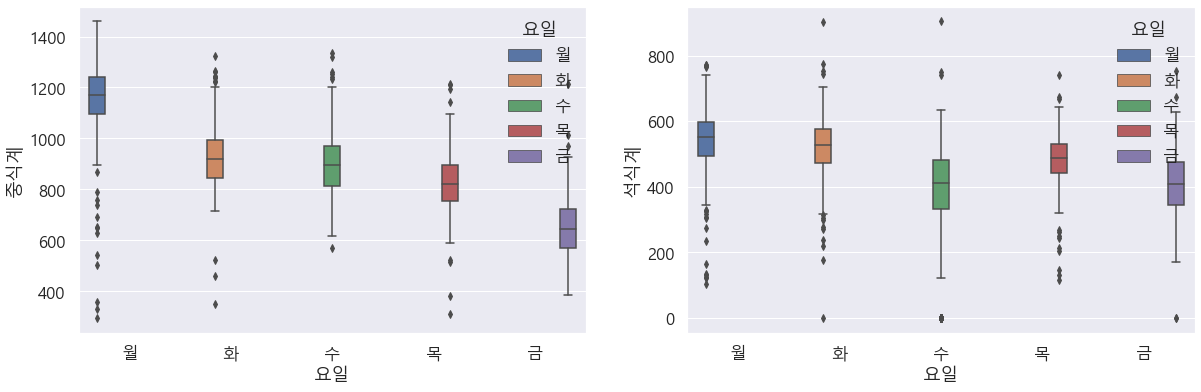

In [20]:
# 요일별 중식계, 석식계

fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(1,2,1)
sns.boxplot('요일','중식계', hue='요일', data=df_train, ax=ax1)

ax2 = fig.add_subplot(1,2,2)
sns.boxplot('요일','석식계', hue='요일', data=df_train, ax=ax2)

<요일별 중식계, 석식계 평균>
- 중식계는 월요일이 1144로 제일 높았고, 금요일이 653으로 제일 낮았다.
- 석식계는 월요일이 538로 제일 높았고, 수요일이 363으로 제일 낮았으며, 금요일은 404로 두번째로 낮았다.

In [21]:
df_train.groupby('요일', as_index=False)[['본사정원수','본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수','현본사소속재택근무자수']].mean()

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수
0,금,2807.817427,245.078838,273.680498,38.995851,37.278008
1,목,2805.815574,137.372951,255.577869,379.545082,42.389344
2,수,2805.690377,113.092050,241.405858,8.209205,45.652720
3,월,2812.049793,174.742739,204.190871,483.767635,45.518672
4,화,2807.712500,119.004167,230.637500,457.308333,46.737500


#### histogram

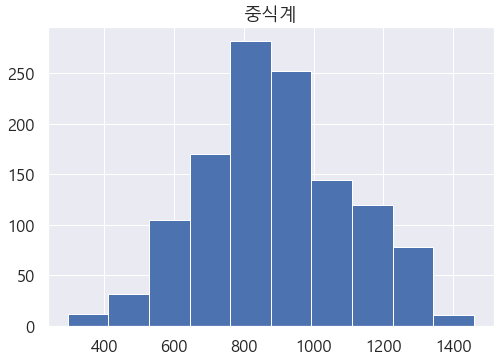

In [22]:
plt.hist(df_train['중식계'])
plt.title('중식계')
plt.show()

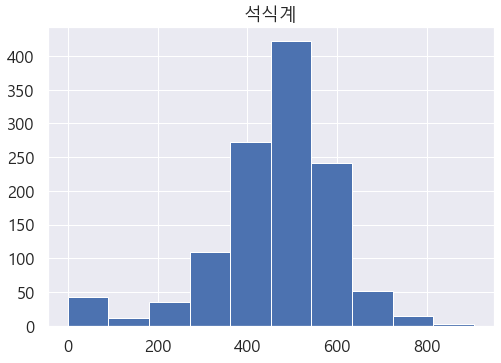

In [23]:
plt.hist(df_train['석식계'])
plt.title('석식계')
plt.show()

<요일별 근무자수 평균>
- 본사정원수는 요일별 비슷했다.
- 본사휴가자수는 금요일과 월요일이 많았다.
- 본사출장자수는 금요일에 많았다.
- 본사시간외근무명령서 승인건수는 수요일 금요일이 적었다.
- 재택근무자수는 요일별 비슷했다.

### 02) 마지막주 수요일 확인하기

- 석식계가 0인 날은 자기계발의 날이 있는것 같다. 이를 확인해본다.

In [24]:
df_train.mean()

본사정원수             2807.815768
본사휴가자수             157.913693
본사출장자수             241.142739
본사시간외근무명령서승인건수     274.117012
현본사소속재택근무자수         43.506224
중식계                890.334440
석식계                461.772614
dtype: float64

In [25]:
df_train[df_train['석식계']==0].mean()

본사정원수             2793.325581
본사휴가자수             133.813953
본사출장자수             253.162791
본사시간외근무명령서승인건수       2.465116
현본사소속재택근무자수          9.000000
중식계                859.581395
석식계                  0.000000
dtype: float64

- 평균은 근무명령서 승인건수, 재택근무자수, 석식계 말고 큰차이가 없음

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [27]:
# datetime으로 날짜 만들어주기
df_train['date']=pd.to_datetime(df_train['일자'])
df_train['year']=df_train['date'].apply(lambda x: x.year)
df_train['month']=df_train['date'].apply(lambda x : x.month)
df_train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,date,year,month
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2016-02-01,2016,2
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2016-02-02,2016,2
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2016-02-03,2016,2
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2016-02-04,2016,2
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2016-02-05,2016,2


In [28]:
# 요일 개수 확인, 별다른 이상 없는것같음
df_train['요일'].value_counts()

목    244
월    241
금    241
화    240
수    239
Name: 요일, dtype: int64

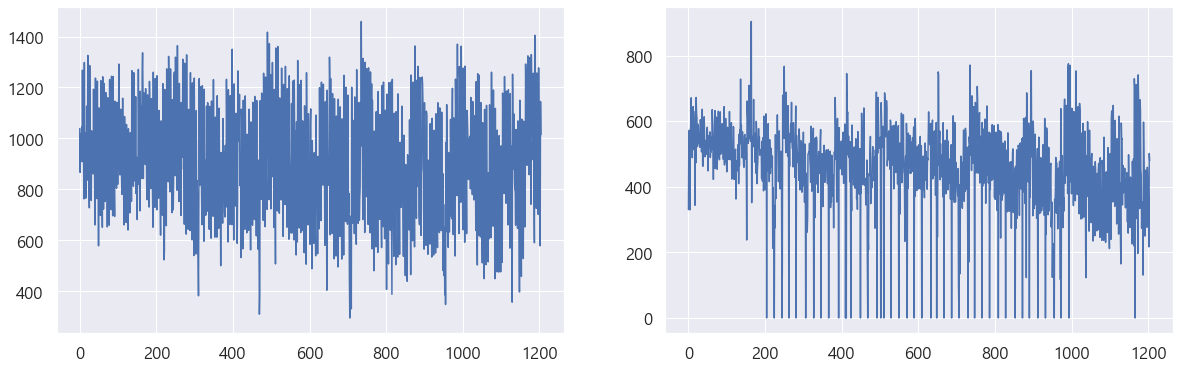

In [29]:
# 전체적인 plot 확인하기 
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(df_train['중식계'])
ax2.plot(df_train['석식계'])

In [30]:
print(df_train['date'].max())
print(df_train['date'].min())
df_train['date'].max() - df_train['date'].min()

2021-01-26 00:00:00
2016-02-01 00:00:00


Timedelta('1821 days 00:00:00')

In [31]:
1821/7

260.14285714285717

- 요일수가 고르다고 생각했는데, 전체일수가 1821 인것에 비해 260씩이아닌, 240개씩이다.
- 휴일이 고르게 분포가 되어있었던것같다

In [32]:
# 마지막주 수요일 보기 실패

### 메뉴분리

나눠서 가장많은것, 가장적은것(other로 묶기) 이렇게 진행해보기

In [192]:
# 모두 분리
all_menu = [x.split(' ') for x in df_train['석식메뉴'].values]

In [193]:
len(all_menu)

1205

In [194]:
# itertools chain으로 다 묶어줌
import itertools
menu = list(set(list(itertools.chain(*all_menu))))

In [195]:
len(menu)

1767

In [196]:
# 괄호와 괄호 내용 삭제
regex = "\(.*\)|\s-\s.*" 

for i in range(len(menu)):
    menu[i] = re.sub(regex, '', menu[i])
    
menu = list(set(menu))

In [197]:
len(menu)

1684

In [198]:
# * 포함된 메뉴 출력
for m in menu:
    if '&'in m:
        print(m)

김말이&만두튀김
햄전&케찹
해물까스&타르타르소스
채소볶음밥&자장소스
잡채밥&짜장소스
수제돈가스&소스
볶음밥&짜장소스
핫도그&케찹
양배추샐러드&사우전D
골뱅이채소무침&실곤약
나가사키면&김
고추잡채&꽃빵
몽골식돈육볶음&꽃빵
골뱅이무침&소면
해물까스&타르타르D
오징어&브로컬리숙회
컵라면&찐계란
부대찌개&쫄면사리


<*종류>
- 그냥 있는거
- *00소스
- *장
- *소스
- *드레싱
- *케찹
- *00S
- *00D
- *소금
- *타르타르


In [ ]:
'''
*, & 없애는 정규식만들기  

"[*].*소스"
"[*].*장"
"[*].*드레싱"
"[*]케찹"
"[*]소금"
"[*]연유"
"[*].*S"
"[*].*D"
"[*]"

'[&].*소스'
'[&]케찹'
'[&].*D'
'[&].*'

'''

In [199]:
# 괄호와 괄호 내용 삭제
regex_list = ["[*].*소스","[*].*장","[*].*드레싱","[*]케찹","[*]소금","[*]연유","[*].*S",
              "[*].*D","[*].*",'[&].*소스','[&]케찹','[&].*D']

for i in range(len(menu)):
    for regex in regex_list:
        menu[i] = re.sub(regex, '', menu[i])
    
menu = list(set(menu))
menu.remove('')
menu

['새우볶음밥',
 '매실주스',
 '삼선짬뽕국',
 '오뗄햄김밥',
 '안동찜닭',
 '미니국수',
 '찐감자/수박',
 '김치우동',
 '치킨퀘사디야',
 '호박새우젓국',
 '타꼬야끼',
 '멕시칸샐러드',
 '머위순나물',
 '열무된장나물',
 '두부양념조림',
 '삼치데리야끼',
 '소떡소떡',
 '장각닭죽',
 '얼갈이된장무침',
 '모듬소세지',
 '냉메밀소바',
 '팽이버섯채소전',
 '매운돈갈비찜',
 '고구마그라탕',
 '매운버섯국',
 '해물짬뽕국',
 '찜닭',
 '훈제오리볶음',
 '사과오이생채',
 '오이보트샐러드',
 '감자튀김/무피클',
 '닭봉오븐구이',
 '우엉조림',
 '쑥갓두부무침',
 '마늘바게뜨/음료',
 '고들빼기무침',
 '너비아니',
 '멘보샤',
 '핫도그',
 '코다리강정',
 '들깨버섯국',
 '무쌈/양파/부추생채',
 '베이컨볶음밥',
 '쨔샤이무침/음료',
 '코코뱅',
 '해라피겨자채',
 '순두부백탕',
 '연근땅콩조림',
 '흑임자샐러드',
 '단배추겉절이',
 '츄러스/참외',
 '모듬묵',
 '상추초무침',
 '삼치양념찜',
 '돼지갈비찜',
 '오이소박이',
 '우거지된장국',
 '들깨미역국',
 '햄전',
 '매운감자국',
 '감자양파국',
 '시금치흑임자샐러드',
 '돈가스또띠아',
 '까르보나라떡볶이',
 '상추겉절이',
 '황태무채국',
 '돈육강정',
 '오이사과무침',
 '바게뜨',
 '굴비구이',
 '포도주스',
 '홍합무우국',
 '구운채소',
 '물만두탕수',
 '메추리알조림',
 '가쓰오장국',
 '떡갈비조림',
 '해물순두부찌개',
 '돈육김치찌개',
 '매운순대국',
 '제육볶음',
 '쇠고기모둠장조림',
 '통고추쌈장무침',
 '오이맛살냉채',
 '멸치호두볶음',
 '고추가루:중국산)',
 '소고기낙지볶음',
 '맑은버섯닭개장',
 '해물된장찌개',
 '북어계란국',
 '유린기',
 '미트볼조림',
 '김말이&만두튀김',
 '미트볼케찹조림',
 '뼈해장국',
 '단호박달걀찜

In [200]:
len(menu)

1622

In [201]:
df_menu = pd.DataFrame({'menu':menu})
df_menu

,menu
0,새우볶음밥
1,매실주스
2,삼선짬뽕국
3,오뗄햄김밥
4,안동찜닭
...,...
1617,생선가스
1618,양배추쌈
1619,오꼬노미야끼계란말이
1620,양념고추지


In [202]:
df_menu = df_menu[~df_menu['menu'].str.contains(':', na=False, case=False)]
df_menu = df_menu[~df_menu['menu'].str.contains('\)', na=False, case=False)]
df_menu = df_menu[~df_menu['menu'].str.contains('\>', na=False, case=False)]
df_menu = df_menu[~df_menu['menu'].str.contains('\(', na=False, case=False)]
df_menu.reset_index(drop=True, inplace = True)

In [265]:
menu_clist = []
for index, m in df_menu.iterrows():
    c = df_train['석식메뉴'].str.contains(m.menu).sum()
    menu_clist.append(c)
#     print(df_train['석식메뉴'].str.contains(m.menu).sum())
#     count = df_train['석식메뉴'].str.contains(m.menu).sum()
#     print(index, m.menu, count)
#     df_menu.iloc[index,:]['count'] = count
#     print(df_menu.iloc[index,:]['count'])

df_menu['count'] = pd.DataFrame({'count' : menu_clist})
df_menu.head()

,menu,count
0,새우볶음밥,2
1,매실주스,3
2,삼선짬뽕국,1
3,오뗄햄김밥,1
4,안동찜닭,10


<AxesSubplot:>

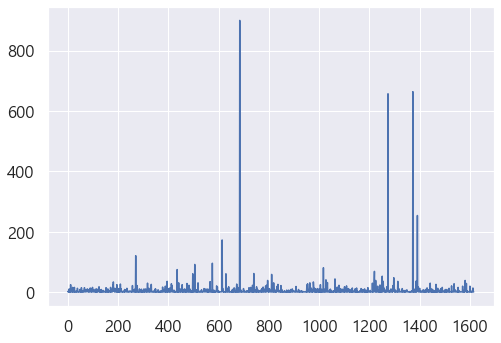

In [266]:
df_menu['count'].plot()

In [282]:
df_menu2 = df_menu.sort_values(by=['count'], axis=0, ascending = False).reset_index(drop=True)
# df_menu2.head(50)

In [283]:
## 너무중복되는게 많아서 이전에 있었던거에 포함되면 삭제하는 방법을 생각해보았다.
# df_menu2 : 기호 등 삭제할거 다 삭제된 메뉴들

df_temp = df_menu2.copy()
for index, m in df_temp.iterrows():
#     print(m.menu)
    for index2, ori_m in df_temp.iloc[:index].iterrows():
#         print(re_m.menu)
        if ori_m['menu'] in m.menu :
            print(index)
            df_menu2.drop(index, inplace=True)
            break

2
30
32
33
36
39
41
52
58
66
69
77
78
85
86
94
97
118
121
124
125
126
130
139
140
143
146
147
151
153
157
158
161
165
174
176
177
184
188
196
198
199
200
202
211
213
214
215
216
220
222
224
226
234
241
242
243
245
250
253
254
256
260
263
268
271
277
279
283
286
287
291
293
294
295
296
301
304
305
307
308
309
311
315
316
318
320
325
326
328
337
338
340
341
349
351
352
354
356
359
360
363
372
375
379
383
384
386
388
390
392
394
398
399
403
409
414
416
418
432
433
436
439
440
444
445
448
449
450
451
454
455
456
465
467
473
475
476
479
482
486
487
490
494
495
499
504
505
506
511
516
519
521
523
524
525
526
527
528
530
531
532
533
534
537
538
540
541
546
552
556
558
559
560
561
571
574
575
580
582
584
586
587
591
592
594
603
606
607
608
610
611
612
613
614
615
617
618
625
628
629
632
635
636
638
641
642
643
644
646
647
648
651
652
654
655
657
659
664
665
666
673
674
676
677
678
679
680
681
683
686
687
689
692
693
695
697
701
704
705
710
719
723
725
726
728
730
733
735
736
739
740
747
748
74

In [284]:
len(df_menu2)

892

In [289]:
df_menu2

,menu,count
0,포기김치,900
1,쌀밥,664
3,샐러드,254
4,장국,173
5,볶음밥,121
6,단무지,96
7,흑미밥,92
8,깍두기,81
9,우동,75
10,김밥,69


In [325]:
menu_clist = []
for index, m in df_menu2.iterrows():
    c = df_train['석식메뉴'].str.contains(m.menu).sum()
    menu_clist.append(c)

df_menu2['count'] = pd.DataFrame({'count' : menu_clist})
df_menu2.head()

,menu,count
0,포기김치,900.0
1,쌀밥,664.0
3,샐러드,173.0
4,장국,121.0
5,볶음밥,96.0


In [327]:
# 1600개에서 892개로 거의 반이 줄었지만, 근본적인 문제는 ....
# 단어 list를 만들어보려한다.
요리 = ['불고기', '카레', '튀김', '까스' ,'파스타', '스파게티']
재료 = ['닭', '오징어','돈육','새우']
# 불고기에 오징어가 들어가면 오징어 불고기 이런식으로 카운트가 안됌
# 닭도 여러가지 종류의 음식이 있어서 카운트가 안됌
# ★파스타, 스파게티 묶어주기
# ★떡볶음, 떡볶이........ 안묶어줘
요리+재료

['불고기', '카레', '튀김', '까스', '파스타', '스파게티', '닭', '오징어', '돈육', '새우']

In [324]:
# test
text = '고구마'
print(df_train['석식메뉴'].str.contains(text).sum())
print(df_menu2['menu'].str.contains(text).sum())
display(df_menu2[df_menu2['menu'].str.contains(text)])

46
11


,menu,count
197,고구마치즈구이,10
310,고구마그라탕,6
330,군고구마,6
385,고구마튀김,5
484,고구마범벅,3
600,고구마순볶음,2
787,고구마순나물,2
900,돈육고구마강정,1
1142,고구마순들깨볶음,1
1163,고구마까스,1


In [326]:
df_menu3 = df_menu2.sort_values(by=['count'], axis=0, ascending = False).reset_index(drop=True)
# df_menu2.head(50)

In [333]:
new_mlist = ['불고기', '카레', '튀김', '까스', '파스타', '스파게티', '닭', '오징어', '돈육', '새우']
add_menu = pd.DataFrame({'menu': new_mlist,
                         'count': [0 for _ in range(len(new_mlist))]})
df_menu3 = pd.concat([df_menu3, add_menu])
df_menu3.reset_index(drop=True, inplace = True)

In [337]:
menu_clist = []
for index, m in df_menu3.iterrows():
    c = df_train['석식메뉴'].str.contains(m.menu).sum()
    menu_clist.append(c)

df_menu3['count'] = pd.DataFrame({'count' : menu_clist})
df_menu3 = df_menu3.sort_values(by=['count'], axis=0, ascending = False).reset_index(drop=True)

In [338]:
## 너무중복되는게 많아서 이전에 있었던거에 포함되면 삭제하는 방법을 생각해보았다.
# df_menu2 : 기호 등 삭제할거 다 삭제된 메뉴들

df_temp = df_menu3.copy()
for index, m in df_temp.iterrows():
#     print(m.menu)
    for index2, ori_m in df_temp.iloc[:index].iterrows():
#         print(re_m.menu)
        if ori_m['menu'] in m.menu :
            df_menu3.drop(index, inplace=True)
            break

In [339]:
len(df_menu3)

782

In [343]:
mlist = df_menu3[:36]

In [344]:
# 몇개정도 해야하려나

### 03) 휴일 수 세기

In [83]:
df_train.groupby(['year','month'], as_index=False)['date'].count()

,year,month,date
0,2016,2,18
1,2016,3,22
2,2016,4,20
3,2016,5,20
4,2016,6,21
5,2016,7,21
6,2016,8,22
7,2016,9,19
8,2016,10,20
9,2016,11,22


- 일자가 빈게 많다~! 어떻게하지!!!
- 보통 4주이면 20개는 있어야 한다~!

# Pre Preocessing

- 마지막주 수요일 True, False 컬럼 넣어주기?


- 정규분포로 바꿔주기
- scale 바꿔주기
